# Clustering by RNA

**Hypothesis**: Since the oHSC population can follow 2 distinct fates (normal hematopoiesis tree, ncMKP pathway), we hypothesize that oHSCs should form two transcriptional sub-clusters. One of these oHSC clusters would, for the most part, not express green fluorescent protein (GFP)- these ones being the oHSCs that differentiate to ncMKPs. If oMKPs are plotted as well, we would expect the ncMKP subset to cluster near the GFP- oHSC cluster, while the other HSC cluster that does have some GFP expression would be farther away from the cMKPs.

In [17]:
# setup: imports

import scanpy as sc
import matplotlib.pyplot as plt

from pathlib import Path
import pyrootutils

# setup: path constants

ROOT = pyrootutils.setup_root(Path.cwd(), indicator='.git')
DATA = ROOT / "data"
FIGURES = ROOT / "figures"

poscablo_path = DATA / "rna_annotation_normalized.h5ad"

Load in the poscablo dataset and plot the pre-computed UMAP

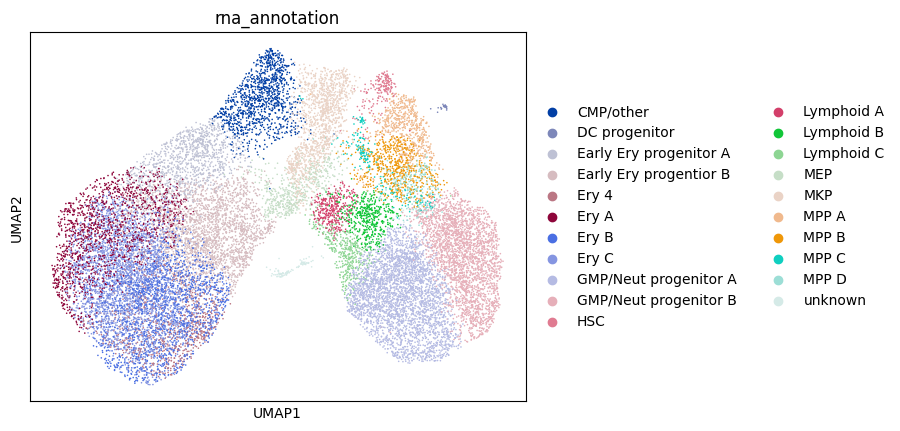

In [2]:
# load & plot data
poscablo = sc.read_h5ad(filename=poscablo_path)
sc.pl.umap(adata=poscablo, color=['rna_annotation'])

We're only concerned with old HSCs and old MKPs here, so we will do the following:
1. Filter for: (HSC or MKP) and (Old)
2. plot umap with cell labels and Egfp markers on old umap embedding
3. recompute neighborhood graph
4. recompute & plot umap with cell labels and Egfp markers

/tmp/ipykernel_16048/1888261960.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_hsc_mkp.obs['annot_egfp'] = (


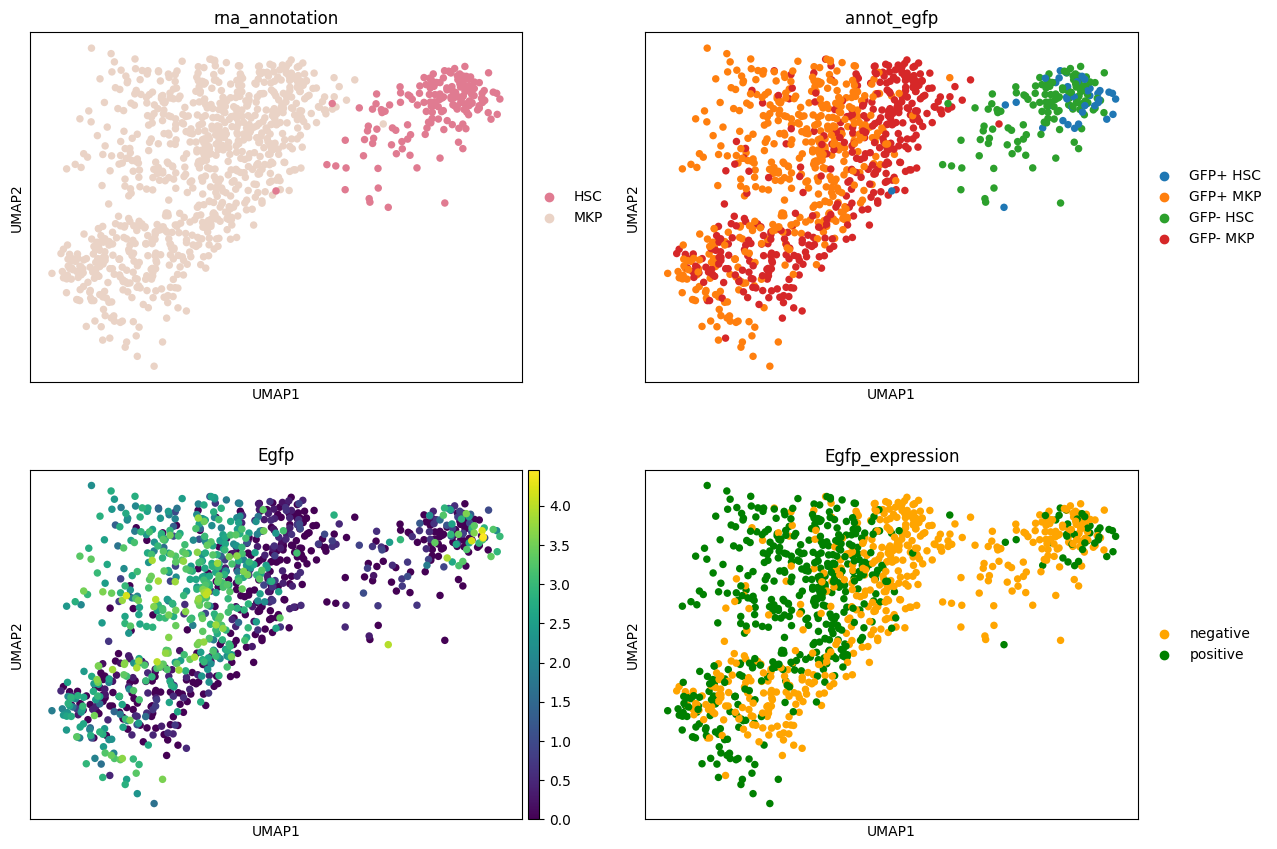

In [ ]:
adata_hsc_mkp = poscablo[
    (poscablo.obs['rna_annotation'].isin({'HSC', 'MKP'}))
    &
    (poscablo.obs['Age'] == 'Old')
]

adata_hsc_mkp.obs['annot_egfp'] = (
    adata_hsc_mkp.obs['Egfp_expression'].astype('str').replace({'positive': 'GFP+ ', 'negative': 'GFP- '})
    + 
    adata_hsc_mkp.obs['rna_annotation'].astype('str')
).astype('category')

sc.pl.umap(
    adata=adata_hsc_mkp, 
    color=['rna_annotation', 'annot_egfp', 'Egfp', 'Egfp_expression'],
    ncols=2
)

On recomputing 